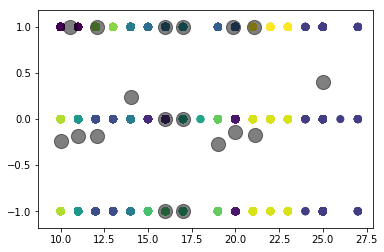

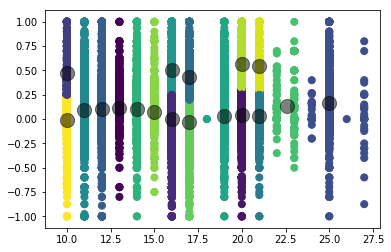

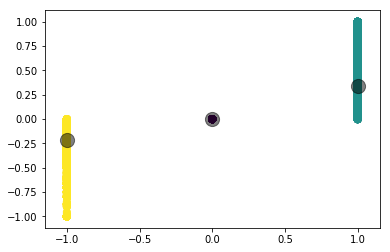

In [15]:
from sklearn.cluster import KMeans  # Clustering Library
from sklearn.decomposition import PCA
import pandas as pd                 # You can visualize the CSV file using 
import numpy as np
import matplotlib.pyplot as plt  

'''
This function makes a 2d array of tags and polarity
'''
def tagsandpolarity(df):
    tagset = set(df['tag_used_for_tweepy'])
    taglist = list(tagset)
    data = []
    
    for index, row in df.iterrows():
        data.append([numericalRepOfTags(row['tag_used_for_tweepy'], taglist) , row['Polarity']])
    
    return data

'''
This function makes a 2d array of tags and sentiment
'''
def tagsandsentiment(df):
    tagset = set(df['tag_used_for_tweepy'])
    taglist = list(tagset)
    data = []
    
    for index, row in df.iterrows():
        data.append([numericalRepOfTags(row['tag_used_for_tweepy'], taglist) , 
                     numericalRepOfSentiment(row['SentimentValue'])])
    
    return data

'''
This helper function returns a numerical representation of tags
'''
def numericalRepOfTags(row, tags):
    for index, item in enumerate(tags):
        if(item == row):
            return index+10

'''
This helper function returns a numerical representation of sentiment
'''
def numericalRepOfSentiment(row):
    if (row == 'Neutral'):
        return 0
    elif (row == 'Negative'):
        return -1
    else:
        return 1

'''
This function makes a 2d array of sentiment and polarity
'''
def sentimentandpolaritygroup(df):
    data = []
    for index, row in df.iterrows():
        #print(row['SentimentValue'])
        if(row['SentimentValue'] == 'Neutral'):
            data.append([0,row['Polarity']])
        elif(row['SentimentValue'] == 'Negative'):
            data.append([-1,row['Polarity']])
        else:
            data.append([1,row['Polarity']])
    return data


'''
This function takes in a 2d array and k to calculate kmeans and generate graph
'''
def kmeans(data, k):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.predict(data)     #lablels
    centers = kmeans.cluster_centers_ #centeriods

    d = np.array(data) #converting to numpy
    
    plt.scatter(d[:, 0], d[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.show()

    
df = pd.read_csv('preprocessedTweet.csv')

data = tagsandsentiment(df)
kmeans(data, 18)

data = tagsandpolarity(df)
kmeans(data, 18)

data = sentimentandpolaritygroup(df)
kmeans(data, 3)

